In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [10]:
data=pd.read_csv('data.csv')
data.head()

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Player            1413 non-null   object
 1   Season            1413 non-null   object
 2   Competition       1413 non-null   object
 3   Matchday          1413 non-null   object
 4   Date              1413 non-null   object
 5   Venue             1413 non-null   object
 6   Club              1413 non-null   object
 7   Opponent          1413 non-null   object
 8   Result            1413 non-null   object
 9   Playing_Position  1355 non-null   object
 10  Minute            1413 non-null   object
 11  At_score          1413 non-null   object
 12  Type              1397 non-null   object
 13  Goal_assist       953 non-null    object
dtypes: object(14)
memory usage: 154.7+ KB


In [12]:
print(data.describe(include='all'))


                   Player Season Competition     Matchday        Date Venue  \
count                1413   1413        1413         1413        1413  1413   
unique                  2     22          21           53         821     2   
top     Cristiano Ronaldo  14/15      LaLiga  Group Stage  2013-01-27     H   
freq                  710    119         785          155           7   823   

                Club    Opponent Result Playing_Position Minute At_score  \
count           1413        1413   1413             1355   1413     1413   
unique             7         173     71               10    108       53   
top     FC Barcelona  Sevilla FC   3:00               CF     90     1:00   
freq             672          65     92              485     29      209   

                    Type  Goal_assist  
count               1397          953  
unique                12          159  
top     Left-footed shot  Luis Suarez  
freq                 549           48  


In [13]:
data.isnull().sum()

Player                0
Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 16
Goal_assist         460
dtype: int64

In [14]:
data=data.fillna(0)
data

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,0
1,Cristiano Ronaldo,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,Cristiano Ronaldo,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,0,88,1:02,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,0,67,3:00,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,0,13,3:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,Cristiano Ronaldo,22/23,Saudi Pro League,18,2023-02-25,A,Al-Nassr FC,Damac FC,0:3,CF,44,0:3,Counter attack goal,Ayman Yahya
1409,Cristiano Ronaldo,22/23,Saudi Pro League,18,2023-02-25,A,Al-Nassr FC,Damac FC,0:3,CF,23,0:2,Left-footed shot,Sultan Al-Ghannam
1410,Lionel Messi,22/23,Ligue 1,25,2023-02-26,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé
1411,Lionel Messi,22/23,Ligue 1,26,2023-03-04,H,Paris Saint-Germain,FC Nantes,4:2,CF,12,1:0,Left-footed shot,0


In [15]:
import pandas as pd
from scipy import stats

# Convert 'Minute' column to numeric
data['Minute'] = pd.to_numeric(data['Minute'], errors='coerce')

# Define a threshold for Z-score
threshold = 3

# Calculate Z-score for the 'Minute' column
z_scores = stats.zscore(data['Minute'])

# Identify outliers based on the threshold
outliers = data[(z_scores > threshold) | (z_scores < -threshold)]

# Print outliers
print("Outliers detected using Z-score method:")
print("=======================================")
print(outliers)

# Remove outliers from the dataset
cleaned_df = data.drop(outliers.index)

# Print cleaned dataset
print("Cleaned dataset after removing outliers:")
print(cleaned_df)

Outliers detected using Z-score method:
Empty DataFrame
Columns: [Player, Season, Competition, Matchday, Date, Venue, Club, Opponent, Result, Playing_Position, Minute, At_score, Type, Goal_assist]
Index: []
Cleaned dataset after removing outliers:
                 Player Season               Competition      Matchday  \
0     Cristiano Ronaldo  02/03             Liga Portugal             6   
1     Cristiano Ronaldo  02/03             Liga Portugal             6   
2     Cristiano Ronaldo  02/03             Liga Portugal             8   
3     Cristiano Ronaldo  02/03  Taca de Portugal Placard  Fourth Round   
4     Cristiano Ronaldo  02/03  Taca de Portugal Placard   Fifth Round   
...                 ...    ...                       ...           ...   
1408  Cristiano Ronaldo  22/23          Saudi Pro League            18   
1409  Cristiano Ronaldo  22/23          Saudi Pro League            18   
1410       Lionel Messi  22/23                   Ligue 1            25   
1411       L

Season             02/03  03/04  04/05  05/06  06/07  07/08  08/09  09/10  \
Player                                                                      
Cristiano Ronaldo      5      6      9     12     23     42     26     33   
Lionel Messi           0      0      1      8     17     16     38     47   

Season             10/11  11-Dec  ...  14/15  15/16  16/17  17/18  18/19  \
Player                            ...                                      
Cristiano Ronaldo     53       0  ...     61     51     42     44     28   
Lionel Messi          53      73  ...     58     41     54     45     51   

Season             19/20  20/21  21/22  22/23  Dec-13  
Player                                                 
Cristiano Ronaldo     37     36     24     12      55  
Lionel Messi          31     38     14     17      60  

[2 rows x 22 columns]


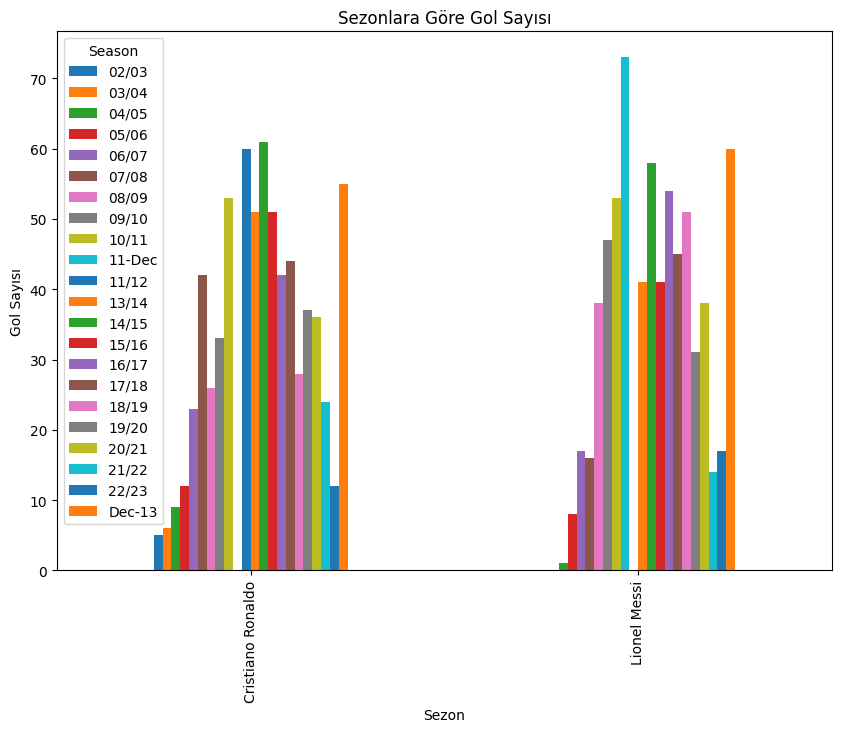

In [9]:
# Sezonlara göre gol sayısı
season_goals = data.groupby(['Player', 'Season']).size().unstack(fill_value=0)
print(season_goals)

# Sezonlara göre gol sayılarının grafiksel gösterimi
season_goals.plot(kind='bar', figsize=(10, 7))
plt.title('Sezonlara Göre Gol Sayısı')
plt.xlabel('Sezon')
plt.ylabel('Gol Sayısı')
plt.show()


Season             Player  02/03  03/04  04/05  05/06  06/07  07/08  08/09  \
0       Cristiano Ronaldo      5      6      9     12     23     42     26   
1            Lionel Messi      0      0      1      8     17     16     38   

Season  09/10  10/11  ...  14/15  15/16  16/17  17/18  18/19  19/20  20/21  \
0          33     53  ...     61     51     42     44     28     37     36   
1          47     53  ...     58     41     54     45     51     31     38   

Season  21/22  22/23  Dec-13  
0          24     12      55  
1          14     17      60  

[2 rows x 23 columns]


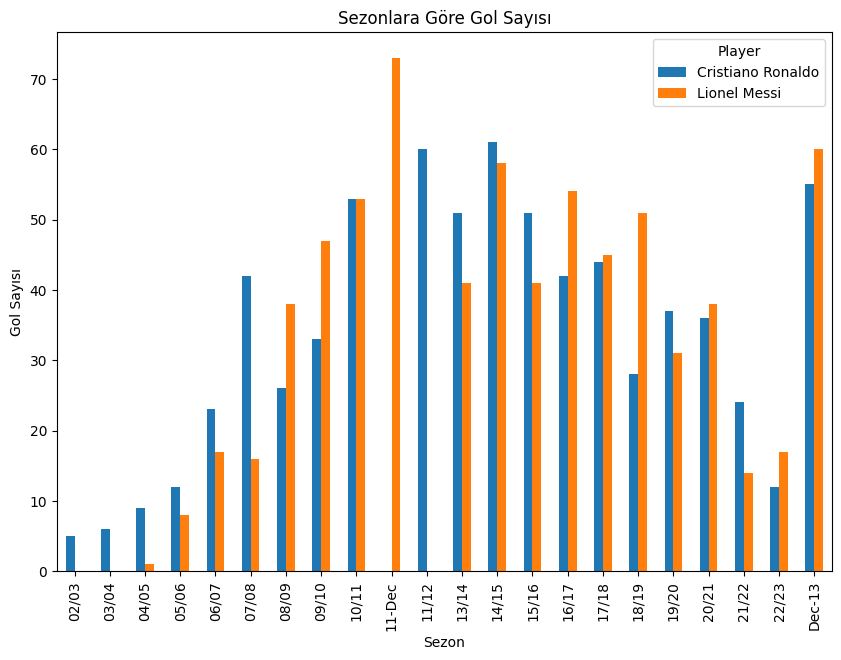

In [16]:
# Sezonlara göre gol sayısı
season_goals_df = data.groupby(['Player', 'Season']).size().unstack(fill_value=0).reset_index()
print(season_goals_df)

# Sezonlara göre gol sayılarının grafiksel gösterimi
season_goals_df.set_index('Player').T.plot(kind='bar', figsize=(10, 7))
plt.title('Sezonlara Göre Gol Sayısı')
plt.xlabel('Sezon')
plt.ylabel('Gol Sayısı')
plt.show()

Type             Player   0  Chest  Counter attack goal  \
0     Cristiano Ronaldo  15      0                    6   
1          Lionel Messi   1      1                    1   

Type  Deflected shot on goal  Direct free kick  Header  Left-footed shot  \
0                          2                49     112               113   
1                          2                52      24               436   

Type  Long distance kick  Penalty  Penalty rebound  Right-footed shot  \
0                      9      132                3                253   
1                      1       84                3                 85   

Type  Solo run  Tap-in  
0            2      14  
1            4       9  


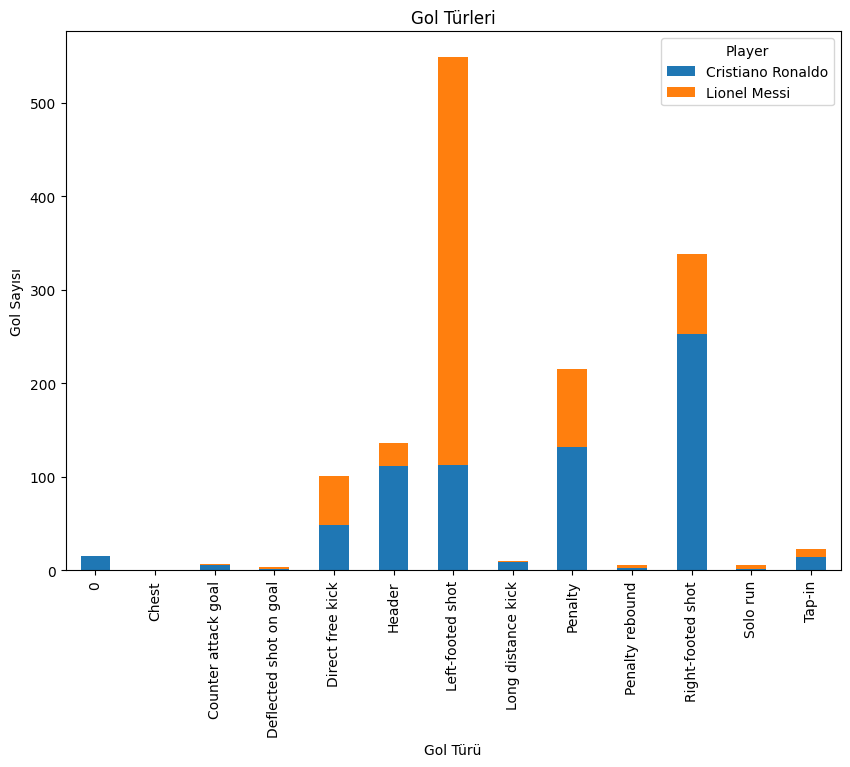

In [17]:
# Gol türleri
goal_types_df = data.groupby(['Player', 'Type']).size().unstack(fill_value=0).reset_index()
print(goal_types_df)

# Gol türlerinin grafiksel gösterimi
goal_types_df.set_index('Player').T.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Gol Türleri')
plt.xlabel('Gol Türü')
plt.ylabel('Gol Sayısı')
plt.show()


In [18]:
# Sezonlara göre asist sayısı
assists_df = data[data['Goal_assist'].notna()].groupby(['Player', 'Season']).size().unstack(fill_value=0).reset_index()
print(assists_df)


Season             Player  02/03  03/04  04/05  05/06  06/07  07/08  08/09  \
0       Cristiano Ronaldo      5      6      9     12     23     42     26   
1            Lionel Messi      0      0      1      8     17     16     38   

Season  09/10  10/11  ...  14/15  15/16  16/17  17/18  18/19  19/20  20/21  \
0          33     53  ...     61     51     42     44     28     37     36   
1          47     53  ...     58     41     54     45     51     31     38   

Season  21/22  22/23  Dec-13  
0          24     12      55  
1          14     17      60  

[2 rows x 23 columns]


Venue             Player    A    H
0      Cristiano Ronaldo  306  404
1           Lionel Messi  284  419


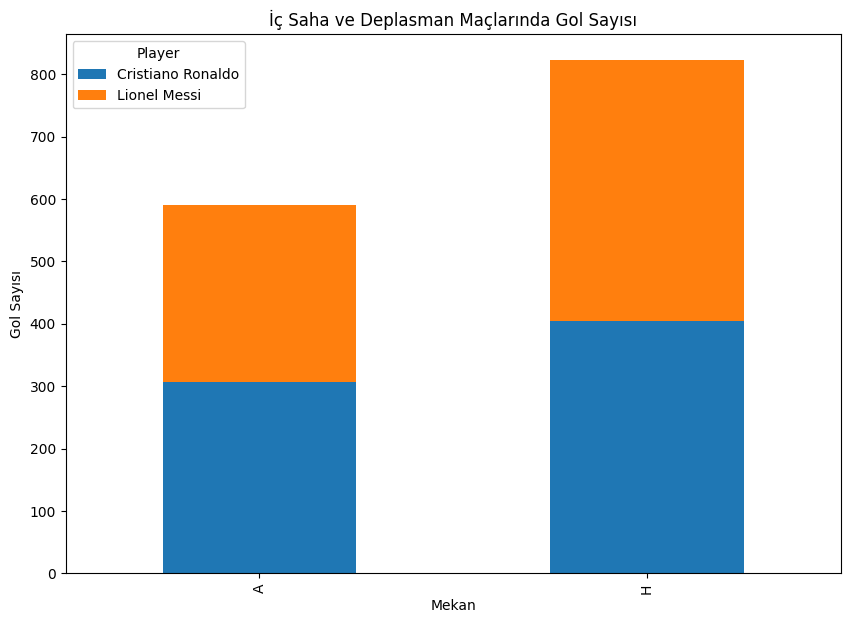

In [19]:
# İç saha ve deplasman maçları
venue_goals_df = data.groupby(['Player', 'Venue']).size().unstack(fill_value=0).reset_index()
print(venue_goals_df)

# İç saha ve deplasman maçları grafiksel gösterimi
venue_goals_df.set_index('Player').T.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('İç Saha ve Deplasman Maçlarında Gol Sayısı')
plt.xlabel('Mekan')
plt.ylabel('Gol Sayısı')
plt.show()


In [20]:
# Rakiplere göre performans
opponent_goals_df = data.groupby(['Player', 'Opponent']).size().unstack(fill_value=0).reset_index()
print(opponent_goals_df)


Opponent             Player  AC Ajaccio  AC Milan  ACF Fiorentina  AJ Auxerre  \
0         Cristiano Ronaldo           0         6               3           1   
1              Lionel Messi           1         8               0           0   

Opponent  APOEL Nicosia  AS Roma  Abha Club  Ajax Amsterdam  Al-Fateh  ...  \
0                     6       10          1               9         1  ...   
1                     3        2          0               6         0  ...   

Opponent  Udinese Calcio  Valencia CF  VfB Stuttgart  VfL Wolfsburg  \
0                      7           15              0              3   
1                      0           31              3              0   

Opponent  Villarreal CF  Watford FC  West Bromwich Albion  West Ham United  \
0                    15           2                     4                6   
1                    16           0                     0                0   

Opponent  Wigan Athletic  Xerez CD  
0                      7         4 

Playing_Position             Player   0  AM  AM    CF  CF    LW  LW    RW  \
0                 Cristiano Ronaldo  58   0    0  209    3  356    5   79   
1                      Lionel Messi   0   8    7  276   40    1    0  221   

Playing_Position  RW   SS  SS   
0                   0   0    0  
1                  95  23   32  


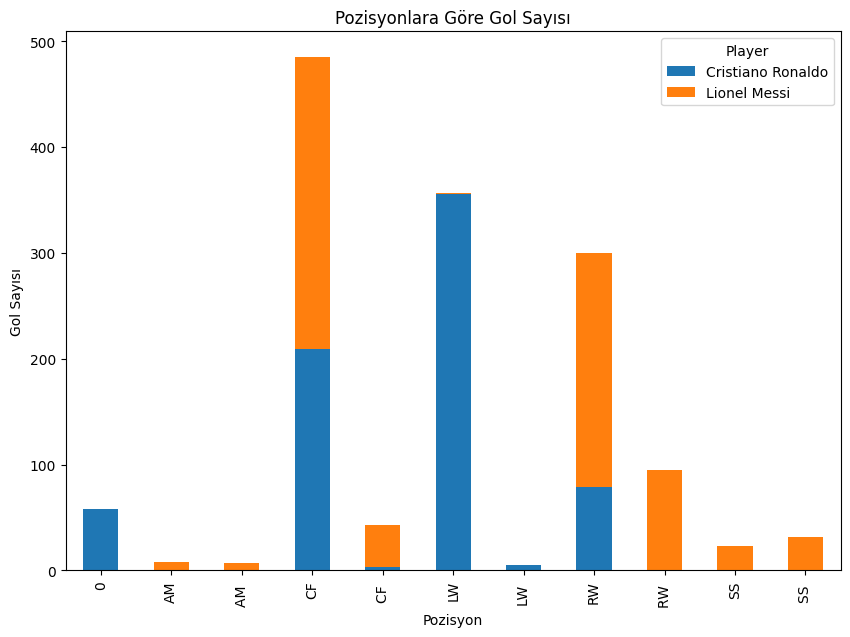

In [21]:
# Pozisyonlara göre performans
position_goals_df = data.groupby(['Player', 'Playing_Position']).size().unstack(fill_value=0).reset_index()
print(position_goals_df)

# Pozisyonlara göre performans grafiksel gösterimi
position_goals_df.set_index('Player').T.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Pozisyonlara Göre Gol Sayısı')
plt.xlabel('Pozisyon')
plt.ylabel('Gol Sayısı')
plt.show()


Minute             Player  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  ...  \
0       Cristiano Ronaldo    1    6    8    4    3    7    2    5    5  ...   
1            Lionel Messi    0    0    4    4    8    2    3    5    4  ...   

Minute  88.0  89.0  90.0  97.0  103.0  104.0  105.0  109.0  110.0  120.0  
0          9    15    17     1      1      1      1      1      0      1  
1          8     9    12     0      0      0      0      0      1      0  

[2 rows x 98 columns]


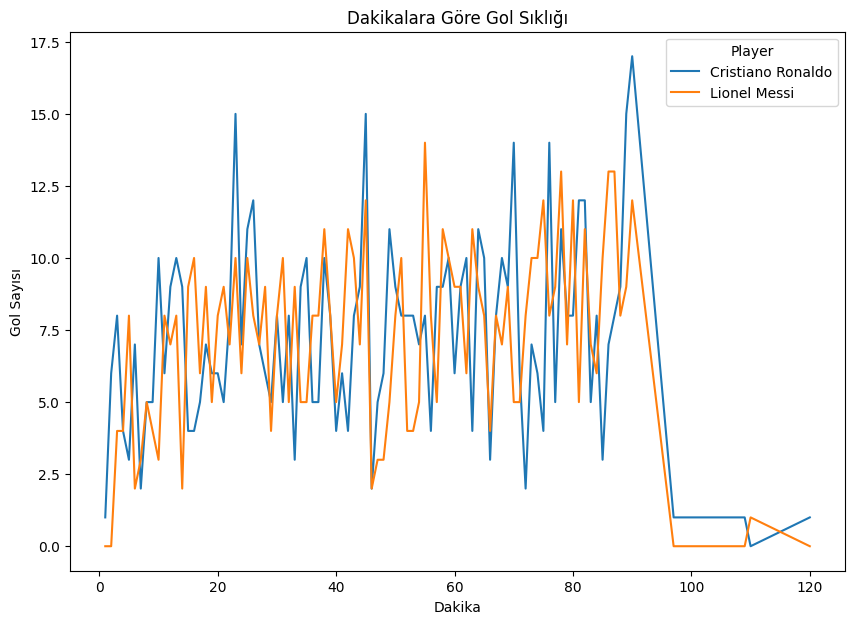

In [22]:
# Dakikalara göre gol sıklığı
minute_goals_df = data.groupby(['Player', 'Minute']).size().unstack(fill_value=0).reset_index()
print(minute_goals_df)

# Dakikalara göre gol sıklığı grafiksel gösterimi
minute_goals_df.set_index('Player').T.plot(kind='line', figsize=(10, 7))
plt.title('Dakikalara Göre Gol Sıklığı')
plt.xlabel('Dakika')
plt.ylabel('Gol Sayısı')
plt.show()


Matchday             Player  Friday  Monday  Saturday  Sunday  Thursday  \
0         Cristiano Ronaldo       9      21       263     167        23   
1              Lionel Messi       3       6       252     204        22   

Matchday  Tuesday  Wednesday  
0             107        120  
1              87        129  


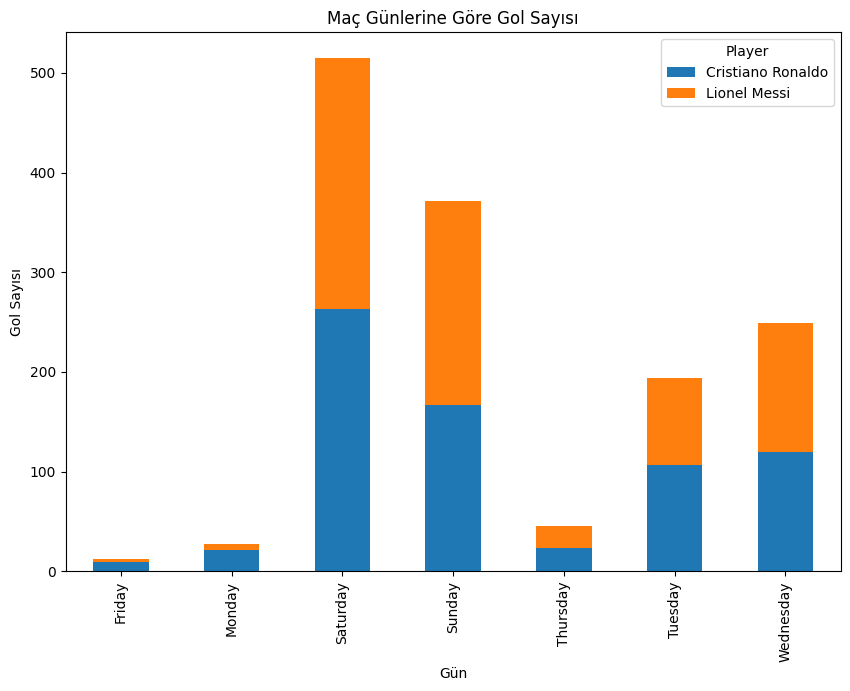

In [23]:
# Maç günlerine göre performans
data['Date'] = pd.to_datetime(data['Date'])
data['Matchday'] = data['Date'].dt.day_name()
matchday_goals_df = data.groupby(['Player', 'Matchday']).size().unstack(fill_value=0).reset_index()
print(matchday_goals_df)

# Maç günlerine göre performans grafiksel gösterimi
matchday_goals_df.set_index('Player').T.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Maç Günlerine Göre Gol Sayısı')
plt.xlabel('Gün')
plt.ylabel('Gol Sayısı')
plt.show()


Playing_Position             Player   0  AM  AM    CF  CF    LW  LW    RW  \
0                 Cristiano Ronaldo  58   0    0  209    3  356    5   79   
1                      Lionel Messi   0   8    7  276   40    1    0  221   

Playing_Position  RW   SS  SS   
0                   0   0    0  
1                  95  23   32  


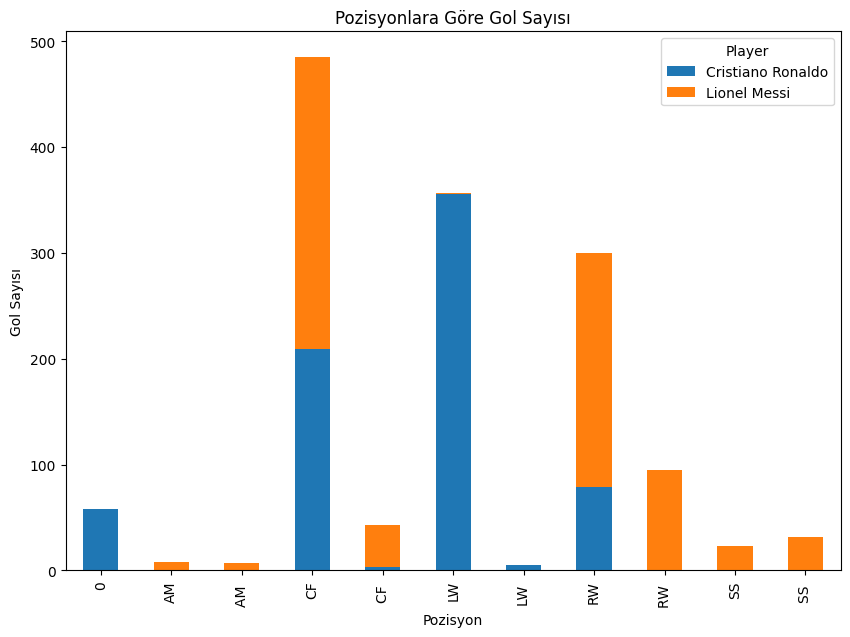

In [25]:
# Pozisyonlara göre performans
position_goals_df = data.groupby(['Player', 'Playing_Position']).size().unstack(fill_value=0).reset_index()
print(position_goals_df)

# Pozisyonlara göre performans grafiksel gösterimi
position_goals_df.set_index('Player').T.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Pozisyonlara Göre Gol Sayısı')
plt.xlabel('Pozisyon')
plt.ylabel('Gol Sayısı')
plt.show()


Goal_assist             Player    0  \t  Aaron Ramsey  Abdulrahman Ghareeb  \
0            Cristiano Ronaldo  246   1             4                    1   
1                 Lionel Messi  214   1             0                    0   

Goal_assist  Achraf Hakimi  Adriano  Adrien Rabiot  Aleix Vidal  \
0                        0        0              1            0   
1                        1        9              0            1   

Goal_assist  Aleksandr Hleb  ...  Toni Kroos  Wayne Rooney  Wes Brown  \
0                         0  ...          10            10          2   
1                         1  ...           0             0          0   

Goal_assist  Xabi Alonso  Xavi  Yaya Toure  Zlatan Ibrahimovic  \
0                      8     0           0                   0   
1                      0    34           4                   5   

Goal_assist  alvaro Arbeloa  alvaro Morata  Ã‰ric Abidal  
0                         4              6             0  
1                         

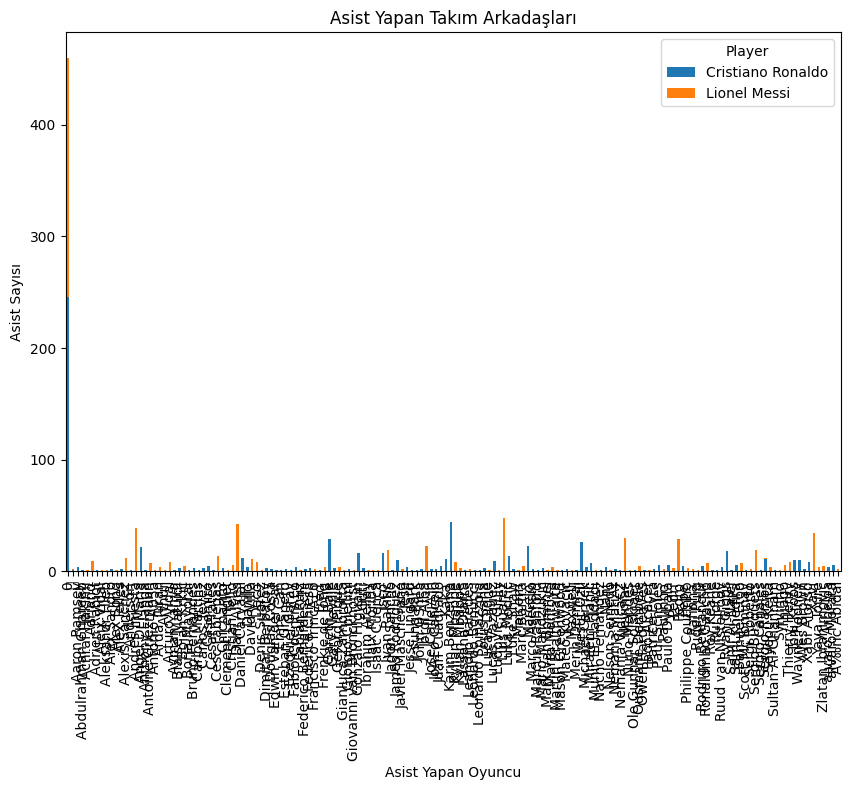

In [27]:
# Asist yapan oyuncular
assist_providers_df = data[data['Goal_assist'].notna()].groupby(['Player', 'Goal_assist']).size().unstack(fill_value=0).reset_index()
print(assist_providers_df)

# Asist yapan oyuncuların grafiksel gösterimi
assist_providers_df.set_index('Player').T.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Asist Yapan Takım Arkadaşları')
plt.xlabel('Asist Yapan Oyuncu')
plt.ylabel('Asist Sayısı')
plt.show()


               Player  Season  Assists  Goals
0   Cristiano Ronaldo   02/03        5      4
1   Cristiano Ronaldo   03/04        6      6
2   Cristiano Ronaldo   04/05        9      8
3   Cristiano Ronaldo   05/06       12     12
4   Cristiano Ronaldo   06/07       23     23
5   Cristiano Ronaldo   07/08       42     40
6   Cristiano Ronaldo   08/09       26     25
7   Cristiano Ronaldo   09/10       33     33
8   Cristiano Ronaldo   10/11       53     51
9   Cristiano Ronaldo   11/12       60     59
10  Cristiano Ronaldo   13/14       51     48
11  Cristiano Ronaldo   14/15       61     59
12  Cristiano Ronaldo   15/16       51     50
13  Cristiano Ronaldo   16/17       42     41
14  Cristiano Ronaldo   17/18       44     41
15  Cristiano Ronaldo   18/19       28     28
16  Cristiano Ronaldo   19/20       37     34
17  Cristiano Ronaldo   20/21       36     34
18  Cristiano Ronaldo   21/22       24     20
19  Cristiano Ronaldo   22/23       12     11
20  Cristiano Ronaldo  Dec-13     

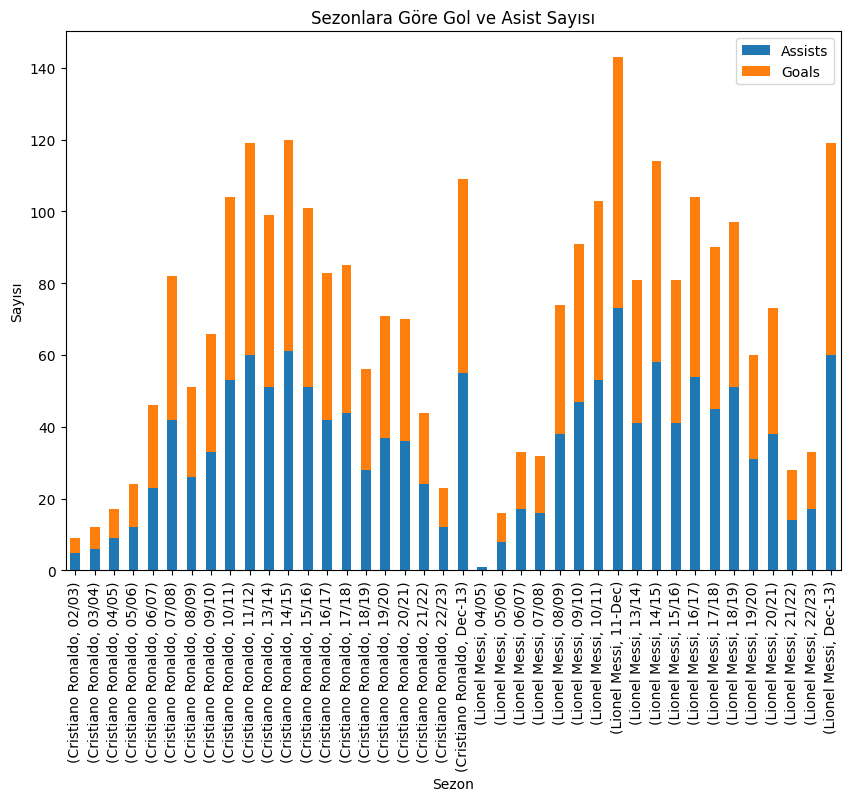

In [28]:
# Sezonlara göre gol ve asist sayısı
season_goals_assists_df = data.groupby(['Player', 'Season']).agg({'Goal_assist': 'count', 'Minute': 'count'}).reset_index()
season_goals_assists_df.columns = ['Player', 'Season', 'Assists', 'Goals']
print(season_goals_assists_df)

# Sezonlara göre gol ve asist sayısının grafiksel gösterimi
season_goals_assists_df.set_index(['Player', 'Season']).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sezonlara Göre Gol ve Asist Sayısı')
plt.xlabel('Sezon')
plt.ylabel('Sayısı')
plt.show()


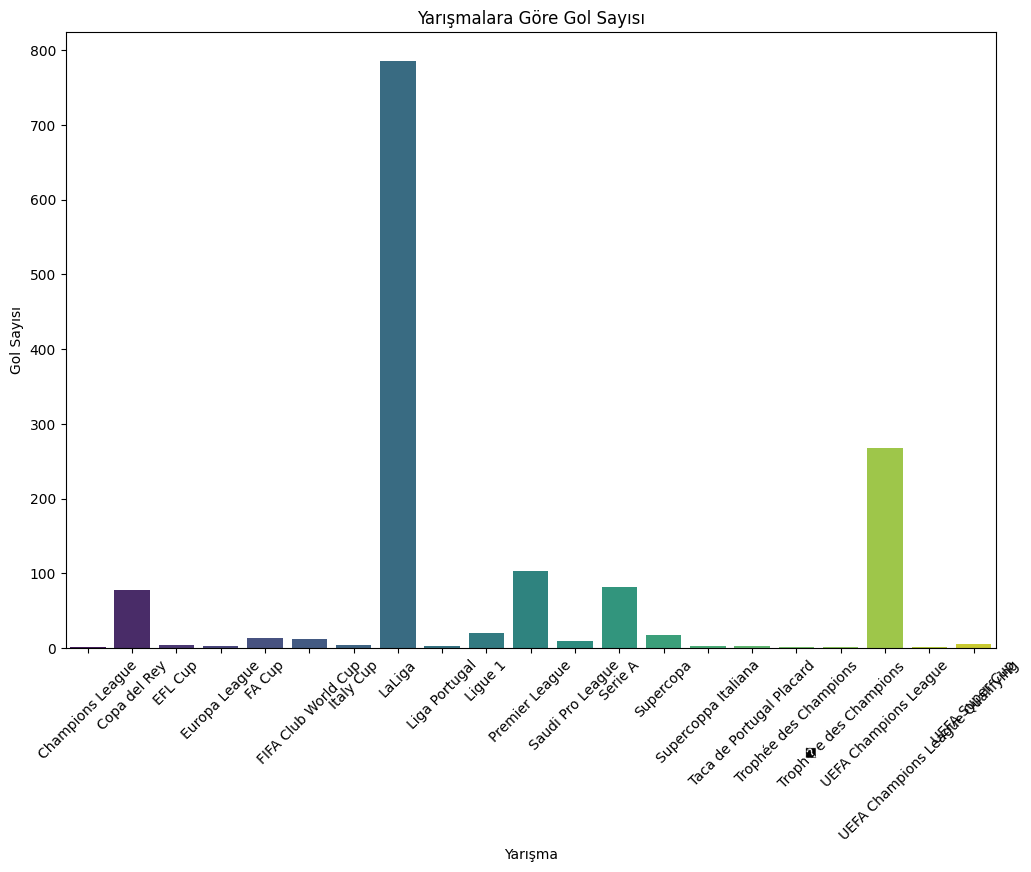

In [29]:
# Her golün yarışmalara göre sayımı
data['Competition'] = data['Competition'].astype('category')  # Yarışma sütununu kategorik veri türüne çevir
data['Goal'] = 1  # Her satırı bir gol olarak saymak için yeni bir sütun ekleyelim

# Yarışmalara göre gol sayısı
competition_goals_count = data.groupby('Competition')['Goal'].sum().reset_index()

# Count-plot grafiği oluşturma
plt.figure(figsize=(12, 8))
sns.barplot(x='Competition', y='Goal', data=competition_goals_count, palette='viridis')
plt.title('Yarışmalara Göre Gol Sayısı')
plt.xlabel('Yarışma')
plt.ylabel('Gol Sayısı')
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndürmek, okunabilirliği artırır
plt.show()
